# <font color=#ffdd00>Pandas</font>

~~~python
df['coluna']                                  # Apenas uma lista do Dataframe
df[['coluna1','coluna2','coluna3']]           # cria um novo Dataframe com as colunas
df[0]                                         # Não funciona assim para Dataframes
df[0:3]                                       # pega da 1ª até a linha 3 do Dataframe
df[-1:]                                       # último linha
df['coluna'][0]                               # pega o primeiro item da coluna
df.head()                                     # apenas as 5 primeiras linhas (cabeçalho) [:5]
df.tail()                                     # apenas as 5 últimas linhas (rodape) [-5:]
df.info()                                     # mostra as informações básicas do Dataframe
display(df)                                   # ao contrário do print mostra em forma de tabela
df.drop(['coluna1','coluna2','coluna3'], axis=1) # exclui as colunas
                                              # axis=0 -> linhas, axis=1 -> Colunas
df = df.rename(columns={'nome_antigo': 'novo_nome'}) # renomeia uma coluna
qt = df['coluna'].value_counts()              # conta cada linha (distinct)
gp_sm_df = df.groupby('coluna').sum()         # soma
gp_md_df = df.groupby('coluna').mean()        # média
gp_mx_df = df.groupby('coluna').max()         # maior valor
mv = df['coluna'].max()                       # pegar maior valor
idx = df['coluna'].idxmax()                   # pegar índice do maior valor
df['coluna'] = df['coluna'].astype(float)     # converte a coluna em float
df['coluna'] = pd.to_numeric(df['coluna'], errors='coerce') # converte a coluna em número
df = df.sort_values(by=['coluna'], ascending=False) # ordena por uma coluna
ndf = df[ vendas_df['coluna'] == 'valor' ]    # filtra (if == )
df['coluna'] = pd.to_datetime(vendas_df['coluna'], format='%d/%m/%Y') # converte em datetime
df['ano'] = vendas_df['coluna'].dt.year       # cria uma coluna "ano" através de uma coluna datetime
df['mes'] = vendas_df['coluna'].dt.month      # cria uma coluna "mes" através de uma coluna datetime
df['dia'] = vendas_df['coluna'].dt.day        # cria uma coluna "dia" através de uma coluna datetime
df = df.set_index('coluna')                   # pega uma coluna e faz ela ser o indice
vl = df.loc['indice_linha', 'indice_coluna' ] # pega um dado de uma linha e coluna pelo índice
vl = df.iloc['n_linha', 'n_coluna' ]          # pega um dado de uma linha e coluna pelo número
~~~

In [2]:
import pandas as pd

# r -> raw string
# r'D:\arquivos\desktop\python\cartilhas\027 Contoso - Vendas - 2017.csv'
# encoding='latin1','ISO-8859-1','utf-8','cp1252'
vendas_df   = pd.read_csv('027 Contoso - Vendas - 2017.csv', sep=';', encoding='utf-8')
produtos_df = pd.read_csv('027 Contoso - Cadastro Produtos.csv', sep=';', encoding='utf-8')
lojas_df    = pd.read_csv('027 Contoso - Lojas.csv', sep=';', encoding='utf-8')
clientes_df = pd.read_csv('027 Contoso - Clientes.csv', sep=';', encoding='utf-8')

<font color=#888888>Excluindo colunas</font>

In [3]:
clientes_df = clientes_df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)

<font color=#888888>Pegando apenas algumas colunas</font>

In [4]:
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

<font color=#888888>Mesclar as tabelas</font>

In [5]:
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

<font color=#888888>Renomeia uma coluna</font>

In [6]:
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})

<font color=#888888>Contando e mostrando em gráfico</font>

<AxesSubplot:>

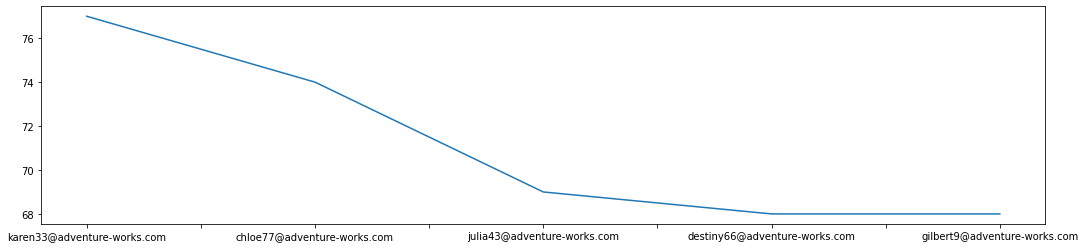

In [7]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
frequencia_clientes[:5].plot(figsize=(18, 4))

<font color=#888888>Agrupando, separando, ordenando e plotando</font>

<AxesSubplot:xlabel='Nome da Loja'>

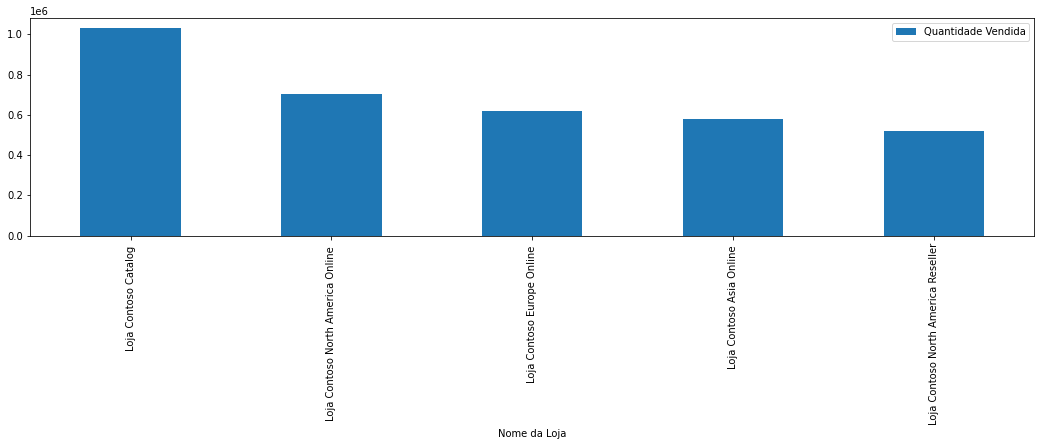

In [8]:
# agrupando e somando
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()

# pegando apenas uma coluna
vendas_lojas = vendas_lojas[['Quantidade Vendida']]

# convertendo o tipo da coluna
vendas_lojas['Quantidade Vendida'] = pd.to_numeric(vendas_lojas['Quantidade Vendida'], errors='coerce')

# ordenando
vendas_lojas = vendas_lojas.sort_values(by='Quantidade Vendida', ascending=False)

# plotando
vendas_lojas[:5].plot(kind='bar', figsize=(18, 4))

<font color=#888888>Pegando apenas a maior loja e maior valor</font>

In [9]:
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)

Loja Contoso Catalog  1029117


<font color=#888888>Percentual de uma coluna sobre a outra</font>

In [10]:
q_vendida = vendas_df['Quantidade Vendida'].sum()
q_devolvida = vendas_df['Quantidade Devolvida'].sum()
print( f'{q_devolvida / q_vendida:.2%}' )

1.17%


<font color=#888888>Filtrando</font>

In [11]:
# lista de verdadeiro ou falso
loja306 = vendas_df['ID Loja'] == 306
vendas_duma_loja = vendas_df[ loja306 ]
q_vendida = vendas_duma_loja['Quantidade Vendida'].sum()
q_devolvida = vendas_duma_loja['Quantidade Devolvida'].sum()
print( f'{q_devolvida / q_vendida:.2%}' )

1.33%


<font color=#888888>Filtrando com duas colunas</font>

In [12]:
# tudo junto
vendas_sem_devolucao = vendas_df[ (vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0) ]
q_vendida = vendas_sem_devolucao['Quantidade Vendida'].sum()
print(q_vendida)

# separado
# loja306 = vendas_df['ID Loja'] == 306
# q_dev_0 = vendas_df['Quantidade Devolvida'] == 0
# vendas_sem_devolucao = vendas_df[ loja306 & q_dev_0 ]

481657


<font color=#888888>Formatando a data para datetime</font>

In [13]:
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')
vendas_df['Data do Envio'] = pd.to_datetime(vendas_df['Data do Envio'], format='%d/%m/%Y')

<font color=#888888>Acrescentando novas colunas: Pegando dia, mes e ano</font>

In [14]:
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mês da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da Venda'] = vendas_df['Data da Venda'].dt.day

<font color=#888888>Pegando o valor de uma célula</font>

In [15]:
produtos_df = pd.read_csv('027 Contoso - Cadastro Produtos.csv', sep=';', encoding='utf-8')
display(produtos_df[:1])
print()
print(produtos_df.loc[0])
print()
#                  linha  coluna
print(produtos_df.loc[0]['Nome do Produto'])
print()
#                  linha  coluna
print(produtos_df.iloc[0, 0])

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22



Nome do Produto                     Contoso Wireless Laser Mouse E50 Grey
Descricao do Produto    Advanced 2.4 GHz cordless technology makes fre...
Fabricante                                                   Contoso, Ltd
Nome da Marca                                                     Contoso
Tipo                                                            Econômico
Custo Unitario                                                      10,69
Preco Unitario                                                      20,96
ID Produto                                                            873
ID Subcategoria                                                        22
Name: 0, dtype: object

Contoso Wireless Laser Mouse E50 Grey

Contoso Wireless Laser Mouse E50 Grey


In [16]:
nv_pd_df = produtos_df.set_index('Nome do Produto')
display(nv_pd_df[:1])
print()
print(nv_pd_df.loc['Contoso Wireless Laser Mouse E50 Grey'])
print()
#                   linha                                    coluna
print(nv_pd_df.loc['Contoso Wireless Laser Mouse E50 Grey', 'Descricao do Produto'])
print()
#               linha  coluna
print(nv_pd_df.iloc[0, 0])

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22



Descricao do Produto    Advanced 2.4 GHz cordless technology makes fre...
Fabricante                                                   Contoso, Ltd
Nome da Marca                                                     Contoso
Tipo                                                            Econômico
Custo Unitario                                                      10,69
Preco Unitario                                                      20,96
ID Produto                                                            873
ID Subcategoria                                                        22
Name: Contoso Wireless Laser Mouse E50 Grey, dtype: object

Advanced 2.4 GHz cordless technology makes freedom, hyper-fast scrolling, laser, and cursor control on virtually any surface

Advanced 2.4 GHz cordless technology makes freedom, hyper-fast scrolling, laser, and cursor control on virtually any surface


<font color=#888888>Alterando o valor de uma célula</font>

In [17]:
# 1ª Forma
#              linha                                    coluna
#nv_pd_df.loc['Contoso Wireless Laser Mouse E50 Grey', 'Descricao do Produto'] = 'Outro Produto'

# 2ª Forma
#            linha                          coluna
nv_pd_df.loc[nv_pd_df['ID Produto'] == 873, 'Preco Unitario'] = 23
display(nv_pd_df[:1])

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69",23,873,22


<font color=#888888>Salvar em arquivo</font>

In [18]:
nv_pd_df.to_csv(r'C:\users\clemas\desktop\nv_pd_df.csv', sep=';')

<font color=#888888>Dicionário para Dataframe</font>

In [19]:
vendas_produtos = {'iphone': [558147, 951642], 'galaxy': [712350, 244295], 'ipad': [573823, 26964], 'tv': [405252, 787604], 'máquina de café': [718654, 867660], 'kindle': [531580, 78830], 'geladeira': [973139, 710331], 'adega': [892292, 646016], 'notebook dell': [422760, 694913], 'notebook hp': [154753, 539704], 'notebook asus': [887061, 324831], 'microsoft surface': [438508, 667179], 'webcam': [237467, 295633], 'caixa de som': [489705, 725316], 'microfone': [328311, 644622], 'câmera canon': [591120, 994303]}
vendas_produtos_df = pd.DataFrame.from_dict(vendas_produtos)
display(vendas_produtos_df)
print()

# as chaves (keys) serão o índice
vendas_produtos_df = pd.DataFrame.from_dict(vendas_produtos, orient='index')
display(vendas_produtos_df.head())
print()

# renomeando as colunas
vendas_produtos_df = vendas_produtos_df.rename(columns={0: 'Vendas 2019', 1: 'Vendas 2020'})
display(vendas_produtos_df.head())
print()

# salvando
vendas_produtos_df.to_csv(r'C:\users\clemas\desktop\nv_pd_df.csv', sep=',', encoding='latin1')

,iphone,galaxy,ipad,tv,máquina de café,kindle,geladeira,adega,notebook dell,notebook hp,notebook asus,microsoft surface,webcam,caixa de som,microfone,câmera canon
0,558147,712350,573823,405252,718654,531580,973139,892292,422760,154753,887061,438508,237467,489705,328311,591120
1,951642,244295,26964,787604,867660,78830,710331,646016,694913,539704,324831,667179,295633,725316,644622,994303


,0,1
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660


,Vendas 2019,Vendas 2020
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660


<font color=#888888>Pegando dados direto da internet</font>

In [20]:
url = 'https://drive.google.com/uc?authuser=0&id=1UzlPy6CZQeAzDXhfc_2sHEyK_Jb50vJs&export=download'
cotacao_df = pd.read_csv(url)
display(cotacao_df)

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2020",4.0195,4.0195,4.0195,4.0195,0.00%
1,"Dec 31, 2019",4.0195,4.0201,4.0201,4.0195,0.00%
2,"Dec 30, 2019",4.0195,4.0484,4.0484,4.0084,-0.65%
3,"Dec 27, 2019",4.0460,4.0568,4.0614,4.0339,-0.25%
4,"Dec 26, 2019",4.0560,4.0827,4.0827,4.0453,-0.68%
...,...,...,...,...,...,...
3908,"Jan 07, 2005",2.7120,2.7230,2.7290,2.6890,-0.36%
3909,"Jan 06, 2005",2.7218,2.7140,2.7340,2.7060,0.27%
3910,"Jan 05, 2005",2.7145,2.6980,2.7331,2.6910,-0.17%
3911,"Jan 04, 2005",2.7190,2.6720,2.7230,2.6720,1.61%


<font color=#888888>Pegando da internet quando o site dá erro</font>

In [46]:
import requests
import io

url = 'http://portalweb.cooxupe.com.br:8080/portal/precohistoricocafe_2.jsp?d-3496238-e=2&6578706f7274=1'
conteudo_url = requests.get(url).content
arquivo = io.StringIO(conteudo_url.decode('latin1'))
cafe_df = pd.read_csv(arquivo, sep=r'\t', engine='python')

# TIRANDO AS ASPAS
# arrumando as colunas
colunas = list(cafe_df.columns)
for i, item in enumerate(colunas):
    colunas[i] = item.replace('"', '')
cafe_df.columns = colunas

# arrumando os valores
for coluna in cafe_df.columns:
    cafe_df[coluna] = cafe_df[coluna].str.replace('"', '')

display(cafe_df.head())

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,2022,1480.49,,,,,,,,,,,
1,2021,639.23,695.33,726.88,744.05,811.06,793.67,762.36,772.03,851.11,1113.29,1285.94,1446.66
2,2020,501.68,493.67,555.23,576.55,566.69,518.24,531.82,555.65,545.8,521.32,551.45,586.98
3,2019,399.98,398.08,390.17,381,392.92,427.09,442.84,417.23,415.82,406.17,447.67,518.57
4,2018,432.26,430.47,421.87,431.5,446.76,466.24,474.96,459.73,442.37,424.54,429.7,410.42


<font color=#888888>Alterando valores de um Excel com pandas</font>

In [22]:
tabela = pd.read_excel('027_Produtos.xlsx')
display(tabela)

# atualizar o multiplicador
tabela.loc[ tabela['Tipo'] == 'Serviço', 'Multiplicador Imposto' ] = 1.5

# atualizar o Preço Base Reais
tabela['Preço Base Reais'] = tabela['Multiplicador Imposto'] * tabela['Preço Base Original']

# salvando o arquivo
tabela.to_excel('027_Produtos_pandas.xlsx', index=False)

,Produtos,Preço Base Original,Tipo,Multiplicador Imposto,Preço Base Reais
0,Tablet,999.99,Produto,1.1,1099.989
1,Pós Graduação,4500.00,Serviço,1.3,5850.000
2,Celular,899.99,Produto,1.1,989.989
3,Passagem Aérea,799.00,Serviço,1.3,1038.700
4,Computador,3000.00,Produto,1.1,3300.000
5,SPA,480.48,Serviço,1.3,624.624
6,Corte Cabelo,50.00,Serviço,1.3,65.000


<font color=#888888>Alterando valores de um Excel com openpyxl</font>

In [23]:
from openpyxl import Workbook, load_workbook

planilha = load_workbook('027_Produtos.xlsx')
aba_ativa = planilha.active
for celula in aba_ativa['C']:
    # pegar a coluna -> celula.column
    if celula.value == 'Serviço':
        linha = celula.row
        aba_ativa[ f'D{linha}' ] = 1.5
planilha.save('027_Produtos_openpyxl.xlsx')

<font color=#888888>Ler CSV em string alterar decimal com vírgula</font>

In [51]:
salario = '''Funcionário;Salário
José Ambrósio;1550,00
Felipe de Melo; 2250,00
Carlos Alberto; 1750,00'''
arquivo = io.StringIO(salario)
salarios_df = pd.read_csv(arquivo, sep=';', engine='python', decimal=',')
display(salarios_df)

,Funcionário,Salário
0,José Ambrósio,1550.0
1,Felipe de Melo,2250.0
2,Carlos Alberto,1750.0


<font color=#888888>Barra de progresso</font>

In [24]:
vendas_df = pd.read_csv(r'027 Contoso - Vendas - 2017.csv', sep=';')

from tqdm import tqdm

pbar = tqdm(total=len(vendas_df['ID Loja']), position=0, leave=True)

for i, id_loja in enumerate(vendas_df['ID Loja']):
    pbar.update()
    if id_loja == 222:
        vendas_df.loc[i, 'Quantidade Devolvida'] += 1
        
display(vendas_df)

 99%|███████████████████████████████████████████████████████████████████████████████████▊ | 967064/980642 [00:06<00:00, 60200.05it/s]

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


100%|█████████████████████████████████████████████████████████████████████████████████████| 980642/980642 [00:20<00:00, 60200.05it/s]